In [36]:
import pandas as pd
df = pd.read_csv('comments.csv')
df.head()

,content,phone_number,datetime,caller,call_type
0,"I recently activated my home phone, so no one knows about this # but me and the phone company. This caller started to call on the third day making frequent calls within 10 -15 minutes from each other. I finally decided to pick up and answer. A guy said that they are doing a research and collecting opinions about products and services. By that time I was very angry with this company, and asked them to never call again and remove my phone number from their list. He apologized and hung up.",1-000-000-0000,8 Feb 2007,Research Company,NaN
1,My caller ID shows this number when I am late at returning a movie to Blockbuster. Luckily when I see this number I know it is them and I answer...then I remember to return the movie.,1-000-000-0000,19 Mar 2007,NaN,NaN
2,Every few days I get calls with this number showing up...I have answered it one time and it was a bill collector. I would dare say its a new way people have found to hide their true numbers...anyone agree?,1-000-000-0000,24 Mar 2007,blank,Debt collector
3,"I had this one on my caller ID awhile back. Last year, on the Montel Williams show, someone addressing the psychic Sylvia Brown (every Wednesday) , said they got a call from this number (all zeros) and when they answered they could barely make out what was being said on the other end. Sylvia said it was a call from her ""deceased relative"". I just learned today that there are new digital methods available for ""cloaking"" a phone number or using false numbers to hide your identity. I have a feeling a lot of telemarketing companys (legal & not) are using these methods to hide from a ""Do Not Call"" lawsuit. Dead relatives my [***]...",1-000-000-0000,26 Mar 2007,unknown,NaN
4,"I get four or five calls from this number almost every day. I have a call blocker that works very well, but the number does show up on the Caller ID. Don't know who it is; don't care who it is. I think I can outlast them.",1-000-000-0000,28 Mar 2007,Privacy,NaN


In [37]:
df = df[pd.notnull(df['content'])]
df = df[pd.notnull(df['call_type'])]


In [38]:
df = df[df.call_type != 'Valid']
df = df[df.call_type != 'Unwanted']
df = df[df.call_type != 'Scam suspicion']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70086 entries, 2 to 246522
Data columns (total 5 columns):
content         70086 non-null object
phone_number    70086 non-null object
datetime        70086 non-null object
caller          50280 non-null object
call_type       70086 non-null object
dtypes: object(5)
memory usage: 3.2+ MB


In [18]:
col = ['content', 'call_type']
df = df[col]

In [19]:
df.columns

Index(['content', 'call_type'], dtype='object')

In [20]:
df.columns = ['content', 'call_type']

In [39]:
df['category_id'] = df['call_type'].factorize()[0]
from io import StringIO
category_id_df = df[['call_type', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'call_type']].values)

In [22]:
pd.options.display.max_colwidth = 10000
df.head(20)

,content,call_type,category_id
2,Every few days I get calls with this number showing up...I have answered it one time and it was a bill collector. I would dare say its a new way people have found to hide their true numbers...anyone agree?,Debt collector,0
17,I have been getting this number on my cell phone and also on my home number as well and I do not answer it. Beware they will continue to call everyday.,Telemarketer,1
20,"My thoughts are that it is a call block deceptive something-or-other that smartipants telecommunicators have figured out to get around the DoNotCallList. Blockbuster called me with the 000-000-0000 number but they had my name and told me I had vids that are late, which I do. My question is why the hell doesn't blockbuster have a number listed instead of the deceptive number? In conclusion, I think a lot of companies have purchased something that makes their number show as all zeros.",Event reminder,2
31,"Yes, the number (000) 000-0000 is a blind number for a debt collection service. Don't bother to answer. If they ask you if you are ""John Smith"" it's just because they hope that you'll verify your name for them.Someone posted that her telephone number was brand new and unpublished. I'd just like her to know that unpublishing your telephone won't stop these calls if the debt collector has a court order/judgment against her. Debt collectors can obtain ""unpublished"" numbers with that Court Order in hand in a matter of days. Also, someone may have given up that number to avoid the same debt collection calls. LOL.",Debt collector,0
32,I answered one of the calls. It was an automated system telling me about a slightly overdue payment on my Gas account.,Unwanted,3
41,Called my cell. No message. My carrier marked it as Scam Likely. CID is a joke.,Scam suspicion,4
42,Called my DNC registered cell. I don’t pick up calls to my cell unless the number is in contacts. Bogus number.,Scam suspicion,4
45,"Phone rang about 4 times I didn't answer it, at 8:13 am",Unwanted,3
47,I entered this number to Google... It comes up as a Government Scam. I ignored the number when the call came in. I knew there was no such number.,Scam suspicion,4
49,"This caller also contacted me on 2019-02-10. Hung up.Never mind. The caller was misunderstood, judging by the caller's recent action. No further message left nor requested.",Silent call,5


                         content  phone_number  datetime  caller  category_id
call_type                                                                    
Debt collector             20775         20775     20775   16745        20775
Event reminder               728           728       728     631          728
Fax                          519           519       519     325          519
Non-profit organization     1134          1134      1134     903         1134
Political call              1420          1420      1420     931         1420
Prank                       2513          2513      2513    1766         2513
Silent call                  423           423       423     197          423
Survey                      1746          1746      1746    1176         1746
Telemarketer               22470         22470     22470   15328        22470
Text message                1146          1146      1146     648         1146


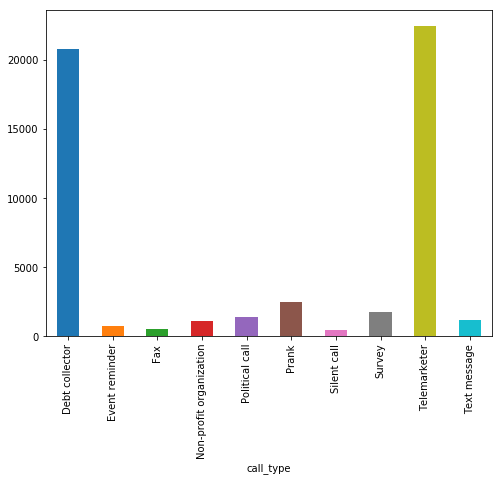

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('call_type').content.count().plot.bar(ylim=0)
print(df.groupby('call_type').count())
plt.show()

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=3, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.content)
labels = df.category_id
features.shape

(52874, 93527)

In [25]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for call_type, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(call_type))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Debt collector':
  . Most correlated unigrams:
       . collection
       . debt
  . Most correlated bigrams:
       . debt collector
       . collection agency
# 'Event reminder':
  . Most correlated unigrams:
       . amtrak
       . appointment
  . Most correlated bigrams:
       . appointment tomorrow
       . time warner
# 'Fax':
  . Most correlated unigrams:
       . faxes
       . fax
  . Most correlated bigrams:
       . fax number
       . junk fax
# 'Non-profit organization':
  . Most correlated unigrams:
       . cancer
       . donations
  . Most correlated bigrams:
       . world vision
       . non profit
# 'Political call':
  . Most correlated unigrams:
       . vote
       . political
  . Most correlated bigrams:
       . republican party
       . political survey
# 'Prank':
  . Most correlated unigrams:
       . irs
       . prank
  . Most correlated bigrams:
       . irs filing
       . jason miller
# 'Scam suspicion':
  . Most correlated unigrams:
       . microso

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['content'], df['call_type'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [13]:
print(clf.predict(count_vect.transform(["This guy tried to let me buy a call_type that I will never use"])))

['Debt collector']


In [14]:
print(clf.predict(count_vect.transform(["Why I keep receiving calls from this damn debet colletcting? I never loan anything from them!"])))

['Debt collector']


In [15]:
print(clf.predict(count_vect.transform(["They said they are from a loan company and I must return my debet to them soon"])))

['Debt collector']


In [16]:
print(clf.predict(count_vect.transform(["They said they are from a loan company and I must return my debet to them soon"])))

['Debt collector']


In [17]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Debt collector']


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

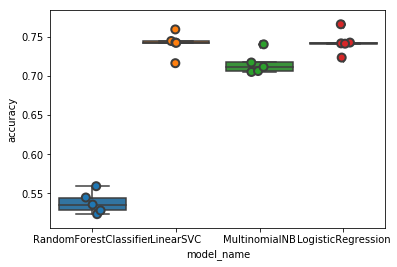

In [43]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

### Before

In [21]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.604730
LogisticRegression        0.620847
MultinomialNB             0.587918
RandomForestClassifier    0.409692
Name: accuracy, dtype: float64

### After

In [29]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.609624
LogisticRegression        0.625619
MultinomialNB             0.592459
RandomForestClassifier    0.410626
Name: accuracy, dtype: float64

In [44]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.741519
LogisticRegression        0.743447
MultinomialNB             0.716476
RandomForestClassifier    0.538092
Name: accuracy, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

# model = LinearSVC()
# model = LogisticRegression(random_state=0)
model = MultinomialNB()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

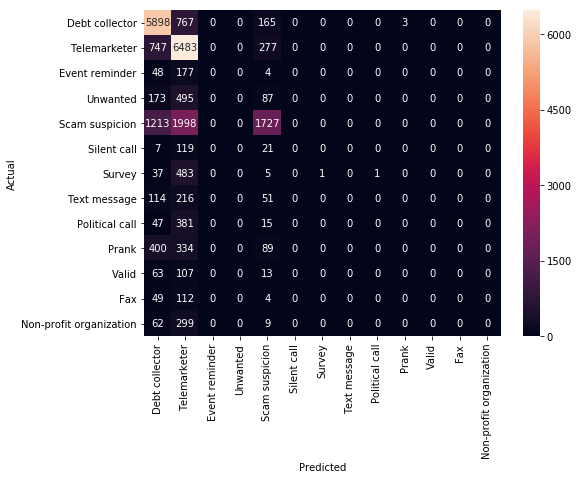

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.call_type.values, yticklabels=category_id_df.call_type.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [28]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
#       display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['call_type', 'content']])
      print('')

'Telemarketer' predicted as 'Debt collector' : 747 examples.

'Event reminder' predicted as 'Debt collector' : 48 examples.

'Unwanted' predicted as 'Debt collector' : 173 examples.

'Scam suspicion' predicted as 'Debt collector' : 1213 examples.

'Silent call' predicted as 'Debt collector' : 7 examples.

'Survey' predicted as 'Debt collector' : 37 examples.

'Text message' predicted as 'Debt collector' : 114 examples.

'Political call' predicted as 'Debt collector' : 47 examples.

'Prank' predicted as 'Debt collector' : 400 examples.

'Valid' predicted as 'Debt collector' : 63 examples.

'Fax' predicted as 'Debt collector' : 49 examples.

'Non-profit organization' predicted as 'Debt collector' : 62 examples.

'Debt collector' predicted as 'Telemarketer' : 767 examples.

'Event reminder' predicted as 'Telemarketer' : 177 examples.

'Unwanted' predicted as 'Telemarketer' : 495 examples.

'Scam suspicion' predicted as 'Telemarketer' : 1998 examples.

'Silent call' predicted as 'Telemarke

In [25]:
model.fit(features, labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [26]:
from sklearn.feature_selection import chi2

N = 2
for call_type, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(call_type))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Debt collector':
  . Top unigrams:
       . collection
       . recovery
  . Top bigrams:
       . message work
       . called job
# 'Event reminder':
  . Top unigrams:
       . amtrak
       . reminder
  . Top bigrams:
       . caller company
       . got 200
# 'Fax':
  . Top unigrams:
       . fax
       . faxes
  . Top bigrams:
       . got fax
       . unsolicited fax
# 'Non-profit organization':
  . Top unigrams:
       . nspire
       . society
  . Top bigrams:
       . disabled police
       . hope house
# 'Political call':
  . Top unigrams:
       . political
       . vote
  . Top bigrams:
       . town hall
       . said political
# 'Prank':
  . Top unigrams:
       . prank
       . pch
  . Top bigrams:
       . message sued
       . computer information
# 'Scam suspicion':
  . Top unigrams:
       . refund
       . microsoft
  . Top bigrams:
       . don computer
       . social security
# 'Silent call':
  . Top unigrams:
       . silent
       . silence
  . Top bigrams:


In [27]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"I requested a home loan modification through Bank of America. Bank of America never got back to me."
  - Predicted as: 'Telemarketer'

"It has been difficult for me to find my past due balance. I missed a regular monthly payment"
  - Predicted as: 'Debt collector'

"I can't get the money out of the country."
  - Predicted as: 'Scam suspicion'

"I have no money to pay my tuition"
  - Predicted as: 'Debt collector'

"Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"
  - Predicted as: 'Debt collector'



### LinearSVC

In [28]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['call_type'].unique()))

                         precision    recall  f1-score   support

         Debt collector       0.72      0.81      0.76      6833
           Telemarketer       0.64      0.76      0.69      7507
         Event reminder       0.57      0.25      0.35       229
               Unwanted       0.25      0.05      0.08       755
         Scam suspicion       0.57      0.57      0.57      4938
            Silent call       0.31      0.11      0.16       147
                 Survey       0.65      0.45      0.53       527
           Text message       0.61      0.49      0.54       381
         Political call       0.73      0.45      0.55       443
                  Prank       0.28      0.07      0.11       823
                  Valid       0.43      0.05      0.10       183
                    Fax       0.74      0.47      0.58       165
Non-profit organization       0.50      0.24      0.33       370

            avg / total       0.62      0.64      0.62     23301



### LogisticRegression

In [22]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['call_type'].unique()))

                         precision    recall  f1-score   support

         Debt collector       0.73      0.82      0.77      6833
           Telemarketer       0.60      0.82      0.70      7507
         Event reminder       0.80      0.09      0.16       229
               Unwanted       0.60      0.00      0.01       755
         Scam suspicion       0.60      0.56      0.58      4938
            Silent call       0.50      0.03      0.06       147
                 Survey       0.71      0.36      0.48       527
           Text message       0.65      0.34      0.45       381
         Political call       0.80      0.27      0.41       443
                  Prank       0.36      0.01      0.03       823
                  Valid       0.00      0.00      0.00       183
                    Fax       0.75      0.28      0.41       165
Non-profit organization       0.72      0.08      0.14       370

            avg / total       0.64      0.65      0.61     23301



### MultinomialNB

In [27]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['call_type'].unique()))

                         precision    recall  f1-score   support

         Debt collector       0.67      0.86      0.75      6833
           Telemarketer       0.54      0.86      0.67      7507
         Event reminder       0.00      0.00      0.00       229
               Unwanted       0.00      0.00      0.00       755
         Scam suspicion       0.70      0.35      0.47      4938
            Silent call       0.00      0.00      0.00       147
                 Survey       1.00      0.00      0.00       527
           Text message       0.00      0.00      0.00       381
         Political call       0.00      0.00      0.00       443
                  Prank       0.00      0.00      0.00       823
                  Valid       0.00      0.00      0.00       183
                    Fax       0.00      0.00      0.00       165
Non-profit organization       0.00      0.00      0.00       370

            avg / total       0.54      0.61      0.53     23301



C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## After removing Valid

### LinearSVC

In [33]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['call_type'].unique()))

                         precision    recall  f1-score   support

         Debt collector       0.73      0.80      0.76      6789
           Telemarketer       0.64      0.77      0.70      7406
         Event reminder       0.67      0.28      0.39       254
               Unwanted       0.27      0.05      0.08       763
         Scam suspicion       0.58      0.58      0.58      4997
            Silent call       0.41      0.08      0.13       157
                 Survey       0.68      0.43      0.52       550
           Text message       0.65      0.54      0.59       378
         Political call       0.74      0.46      0.57       456
                  Prank       0.33      0.08      0.13       852
                    Fax       0.75      0.48      0.59       166
Non-profit organization       0.51      0.23      0.32       361

            avg / total       0.63      0.65      0.63     23129



### LogisticRegression

In [31]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['call_type'].unique()))


                         precision    recall  f1-score   support

         Debt collector       0.73      0.82      0.77      6789
           Telemarketer       0.60      0.83      0.70      7406
         Event reminder       0.76      0.06      0.12       254
               Unwanted       0.33      0.00      0.01       763
         Scam suspicion       0.61      0.56      0.58      4997
            Silent call       0.75      0.02      0.04       157
                 Survey       0.74      0.34      0.47       550
           Text message       0.66      0.35      0.46       378
         Political call       0.76      0.27      0.40       456
                  Prank       0.55      0.02      0.04       852
                    Fax       0.78      0.30      0.43       166
Non-profit organization       0.59      0.07      0.13       361

            avg / total       0.64      0.65      0.61     23129



### MultinomialNB

In [35]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['call_type'].unique()))

                         precision    recall  f1-score   support

         Debt collector       0.68      0.87      0.76      6789
           Telemarketer       0.55      0.88      0.67      7406
         Event reminder       0.00      0.00      0.00       254
               Unwanted       0.00      0.00      0.00       763
         Scam suspicion       0.74      0.37      0.49      4997
            Silent call       0.00      0.00      0.00       157
                 Survey       0.00      0.00      0.00       550
           Text message       0.00      0.00      0.00       378
         Political call       0.00      0.00      0.00       456
                  Prank       0.00      0.00      0.00       852
                    Fax       0.00      0.00      0.00       166
Non-profit organization       0.00      0.00      0.00       361

            avg / total       0.53      0.62      0.55     23129



C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
### LinearSVC

In [46]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['call_type'].unique()))

                         precision    recall  f1-score   support

         Debt collector       0.82      0.86      0.84      6938
           Telemarketer       0.74      0.87      0.80      7322
         Event reminder       0.71      0.26      0.38       230
            Silent call       0.61      0.14      0.23       162
                 Survey       0.74      0.44      0.55       576
           Text message       0.79      0.54      0.64       373
         Political call       0.76      0.44      0.56       453
                  Prank       0.36      0.12      0.18       828
                    Fax       0.82      0.57      0.67       175
Non-profit organization       0.63      0.26      0.37       392

            avg / total       0.75      0.77      0.75     17449



In [ ]:
### LogisticRegression

In [48]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['call_type'].unique()))

                         precision    recall  f1-score   support

         Debt collector       0.82      0.86      0.84      6938
           Telemarketer       0.71      0.91      0.79      7322
         Event reminder       0.94      0.07      0.12       230
            Silent call       0.89      0.05      0.09       162
                 Survey       0.76      0.35      0.48       576
           Text message       0.83      0.39      0.53       373
         Political call       0.76      0.27      0.40       453
                  Prank       0.47      0.03      0.06       828
                    Fax       0.88      0.30      0.44       175
Non-profit organization       0.76      0.07      0.13       392

            avg / total       0.75      0.76      0.72     17449



In [2]:
### MultinomialNB

In [50]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['call_type'].unique()))

                         precision    recall  f1-score   support

         Debt collector       0.80      0.87      0.84      6938
           Telemarketer       0.67      0.91      0.77      7322
         Event reminder       0.00      0.00      0.00       230
            Silent call       0.00      0.00      0.00       162
                 Survey       1.00      0.01      0.01       576
           Text message       0.00      0.00      0.00       373
         Political call       1.00      0.00      0.01       453
                  Prank       0.00      0.00      0.00       828
                    Fax       0.00      0.00      0.00       175
Non-profit organization       1.00      0.00      0.01       392

            avg / total       0.68      0.73      0.66     17449



C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
